# Regression with DNN

**Objectives :**

* Predicts housing prices from a set of house features.
* Understanding the principle and the architecture of a regression with a dense neural network with backup and restore of the trained model.

The [Boston Housing Prices Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) consists of price of houses in various places in Boston.
Alongside with price, the dataset also provide these information :

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft
* INDUS: This is the proportion of non-retail business acres per town
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)^2, where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

**What we're going to do :**

* (Retrieve data)
* (Preparing the data)
* (Build a model)
* Train and save the model
* Restore saved model
* Evaluate the model
* Make some predictions


In [ ]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,sys

from IPython.display import Markdown
from importlib import reload


In [ ]:
#from google.colab import files
#uploaded = files.upload()

Load the boston housing dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('gdrive/My Drive/ESILV_A4/BostonHousing.csv', sep=',',header=0)

Mounted at /content/gdrive


In [ ]:
#!gdown --id 1KPtqvNpUKMxx81TpMbgMB7GIXahZUO86
#data = pd.read_csv('BostonHousing.csv', sep=',',header=0)

In [ ]:


display(data.head(5).style.format("{0:.2f}"))
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Missing Data :  0   Shape is :  (506, 14)


## Exe 1: Data Preparation


Use 70% of the data for training and 30% for validation.
The dataset is shuffled and shared between learning and testing.
x will be input data and y the expected output
Check the data shape and sizes.

In [ ]:
# ---- Shuffle and Split => train, test
#
data       = data.sample(frac=1., axis=0)
data_train = data.sample(frac=0.7, axis=0)
data_test  = data.drop(data_train.index)

# ---- Split => x,y (medv is price)
#
x_train = data_train.drop('medv',  axis=1)
y_train = data_train['medv']
x_test  = data_test.drop('medv',   axis=1)
y_test  = data_test['medv']

print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)

Original data shape was :  (506, 14)
x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


## Exe 2: Data normalization

Normalizing data For each feature in the input data (a column in the
input data matrix), subtract the mean of the feature and divide by the standard
deviation

**Note :**

* All input data must be normalized, train and test.
* To do this we will subtract the mean and divide by the standard deviation.
* But test data should not be used in any way, even for normalization.
* The mean and the standard deviation will therefore only be calculated with the train data.


In [ ]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test), np.array(y_test)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.32,11.81,11.12,0.07,0.55,6.31,69.33,3.79,9.35,405.28,18.42,358.80,12.58
std,8.22,23.88,6.94,0.25,0.11,0.73,27.75,2.15,8.49,165.37,2.21,87.35,7.05
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.14,1.00,187.00,12.60,2.52,1.73
25%,0.08,0.00,5.13,0.00,0.45,5.89,43.83,2.09,4.00,284.00,17.00,373.85,6.78
50%,0.27,0.00,9.12,0.00,0.54,6.19,78.05,3.10,5.00,330.00,19.10,390.95,11.38
75%,2.74,17.88,18.10,0.00,0.62,6.65,94.07,5.12,8.00,666.00,20.20,396.04,17.07
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.49,-1.54,-0.27,-1.49,-3.78,-2.39,-1.24,-0.98,-1.32,-2.64,-4.08,-1.54
25%,-0.39,-0.49,-0.86,-0.27,-0.89,-0.58,-0.92,-0.79,-0.63,-0.73,-0.64,0.17,-0.82
50%,-0.37,-0.49,-0.29,-0.27,-0.14,-0.17,0.31,-0.32,-0.51,-0.46,0.31,0.37,-0.17
75%,-0.07,0.25,1.00,-0.27,0.62,0.46,0.89,0.62,-0.16,1.58,0.81,0.43,0.64
max,10.43,3.69,2.39,3.70,2.80,3.40,1.11,3.87,1.73,1.85,1.62,0.44,3.60


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
26,-0.32,-0.49,-0.43,-0.27,-0.14,-0.68,0.76,0.41,-0.63,-0.59,1.17,0.21,0.32
104,-0.39,-0.49,-0.37,-0.27,-0.30,-0.20,0.74,-0.64,-0.51,-0.13,1.12,0.39,-0.04
340,-0.40,-0.49,-0.85,-0.27,-0.34,-0.47,-0.39,0.47,-0.51,-1.10,0.81,0.44,-0.47
200,-0.40,3.48,-1.39,-0.27,-1.33,1.14,-2.00,1.79,-0.75,-0.02,-0.64,0.29,-1.15
220,-0.36,-0.49,-0.71,3.70,-0.41,0.88,0.69,-0.43,-0.16,-0.59,-0.46,0.38,-0.41


## Exo4:  Model Design

Design a neural network architecture with two hidden layers, each consisting of 64 units and utilizing the ReLU activation function. To obtain a linear output layer, include a final layer with a single unit and no activation function. Compile the network using the mean squared error (MSE) loss function. Additionally, monitor a new metric, mean absolute error (MAE), during training. Finally, define the optimizer as 'rmsprop' in the model compilation.

Define the model within a function named build_model(shape)


More informations about :


* [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
* [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
* [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)




In [ ]:
from keras import models
from keras import layers

def build_model(shape):
    model = models.Sequential()

    # First hidden layer
    model.add(layers.Dense(64, activation='relu', input_shape=(shape,)))

    # Second hidden layer
    model.add(layers.Dense(64, activation='relu'))

    # Output layer
    model.add(layers.Dense(1,activation = None))  # No activation for a linear output

    # Compiling the model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model


## Exe 5 : Model Building

 Use the build_model function to create a model with a shape equal to the number of features. Display its summary.

In [ ]:
model=build_model(13)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




## Exe 6 : Model Fitting

Fit the model on the train set with the test set as the
validation set, 60 epochs and save it in history.



In [ ]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    validation_data=(x_test, y_test))

Epoch 1/60
12/12 [==============================] - 3s 32ms/step - loss: 552.1506 - mae: 21.5143 - val_loss: 448.5218 - val_mae: 19.3685
Epoch 2/60
12/12 [==============================] - 0s 9ms/step - loss: 460.8193 - mae: 19.2943 - val_loss: 362.8507 - val_mae: 17.2042
Epoch 3/60
12/12 [==============================] - 0s 10ms/step - loss: 369.8137 - mae: 16.9496 - val_loss: 282.2779 - val_mae: 14.8644
Epoch 4/60
12/12 [==============================] - 0s 8ms/step - loss: 283.0103 - mae: 14.3601 - val_loss: 191.6039 - val_mae: 11.8748
Epoch 5/60
12/12 [==============================] - 0s 9ms/step - loss: 194.1277 - mae: 11.3746 - val_loss: 124.2812 - val_mae: 9.0770
Epoch 6/60
12/12 [==============================] - 0s 10ms/step - loss: 129.7236 - mae: 8.7368 - val_loss: 81.3462 - val_mae: 7.0430
Epoch 7/60
12/12 [==============================] - 0s 8ms/step - loss: 87.4613 - mae: 6.9073 - val_loss: 59.0166 - val_mae: 6.0158
Epoch 8/60
12/12 [==============================] - 0

## Exe 7 : Model evaluation

It is the moment for checking the model performance on the test dataset.

Check the test loss and mae of the model.

* MAE = Mean Absolute Error (between the labels and predictions)

=> A mae equal to 3 represents an average error in prediction of $3k.

In [ ]:
score = model.evaluate(x_test, y_test)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))

5/5 [==============================] - 0s 3ms/step - loss: 12.7085 - mae: 2.4495
x_test / loss      : 12.7085
x_test / mae       : 2.4495


## Exe 8 : Training histroy

What was the best result during our training ?

In [ ]:
df=pd.DataFrame(data=history.history)
display(df)

,loss,mae,val_loss,val_mae
0,552.150574,21.514273,448.521790,19.368534
1,460.819336,19.294260,362.850677,17.204157
2,369.813660,16.949629,282.277893,14.864394
3,283.010284,14.360085,191.603882,11.874841
4,194.127655,11.374612,124.281212,9.077044
5,129.723572,8.736778,81.346184,7.042975
6,87.461250,6.907313,59.016582,6.015801
7,64.176117,5.924489,46.781734,5.387702
8,51.026455,5.277690,39.332428,4.987767
9,40.641735,4.779544,33.405178,4.541679


In [ ]:
print("min( val_mae ) : {:.4f}".format( min(history.history["val_mae"]) ) )

min( val_mae ) : 2.4473


In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

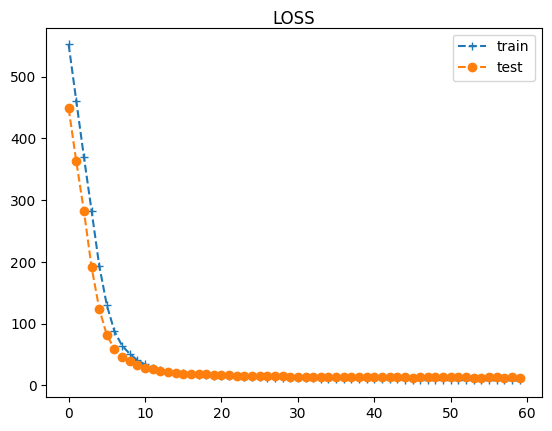

In [ ]:

plt.plot(history.history['loss'],linestyle='--', marker='+', label='train' )
plt.plot(history.history['val_loss'],linestyle='--', marker='o', label='test')
plt.title('LOSS', pad=-50)
plt.legend()
#plt.title('lrate='+str(lrate), pad=-50)



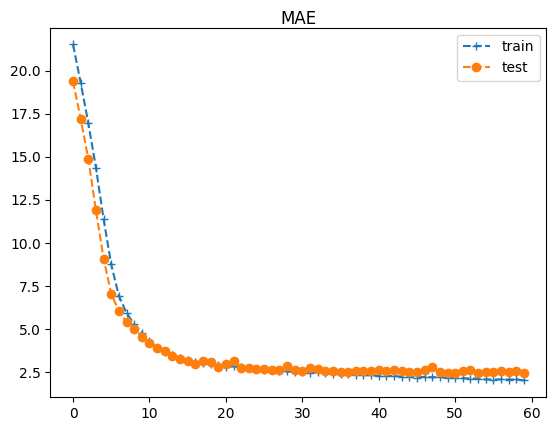

In [ ]:
plt.plot(history.history['mae'],linestyle='--', marker='+', label='train' )
plt.plot(history.history['val_mae'],linestyle='--', marker='o', label='test')
plt.title('MAE', pad=-50)
plt.legend()

## Exe 9: Model Prediction

Use the trained neural network model, to predict the price of a given house and compare the result with the ground truth

In [ ]:


my_house = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]
real_price = 10.4

my_house= np.array([my_house])



In [ ]:


predictions = model.predict(my_house)
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))



1/1 [==============================] - 0s 128ms/step
Prediction : 9.40 K$
Reality    : 10.40 K$


## Exe 10 Early stoping

Create a neural network with the following specifications:

* Number of hidden layers: 2
* Number of units in each hidden layer: 64
* Activation function for the hidden layers: ReLU
* Output layer: Single unit with no activation function (for linear output)
* Loss function: Mean Squared Error (MSE)
* Additional metric to monitor during training: Mean Absolute Error (MAE)
* Optimizer: 'rmsprop'
* Apply dropout after each hidden layer with a dropout rate of 0.5 (50% of nodes dropped randomly for the following layer)
* Minibatch size: 100
* Use early stopping for fitting the model with patience=20 and epochs = 300
* Save the best model as 'model_best'
* Evaluate the saved model on the test data

In [ ]:
  model = keras.models.Sequential()
  # Adding layers to the model
  model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(layers.Dropout(0.5))  # Dropout after the first hidden layer
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.5))  # Dropout after the second hidden layer
  model.add(layers.Dense(1))      # Output layer


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [ ]:
# Callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('model_best.h5', monitor='val_loss', mode='min', save_best_only=True)

# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=300, batch_size=100,
                    validation_data=(x_test, y_test), callbacks=[es, mc], verbose=1)


Epoch 1/300
4/4 [==============================] - 2s 64ms/step - loss: 576.0698 - mae: 22.0986 - val_loss: 508.4419 - val_mae: 20.9266
Epoch 2/300
4/4 [==============================] - 0s 17ms/step - loss: 546.3490 - mae: 21.4513 - val_loss: 481.7961 - val_mae: 20.2958
Epoch 3/300
4/4 [==============================] - 0s 16ms/step - loss: 512.6773 - mae: 20.6915 - val_loss: 454.8480 - val_mae: 19.6413
Epoch 4/300
4/4 [==============================] - 0s 16ms/step - loss: 483.6616 - mae: 20.0568 - val_loss: 427.3295 - val_mae: 18.9642
Epoch 5/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 16ms/step - loss: 450.8640 - mae: 19.1995 - val_loss: 399.0981 - val_mae: 18.2403
Epoch 6/300
4/4 [==============================] - 0s 16ms/step - loss: 434.2579 - mae: 18.7642 - val_loss: 370.6732 - val_mae: 17.4919
Epoch 7/300
4/4 [==============================] - 0s 16ms/step - loss: 395.0736 - mae: 17.8040 - val_loss: 339.8308 - val_mae: 16.6691
Epoch 8/300
4/4 [==============================] - 0s 16ms/step - loss: 364.9458 - mae: 16.8445 - val_loss: 308.9051 - val_mae: 15.7936
Epoch 9/300
4/4 [==============================] - 0s 17ms/step - loss: 337.4354 - mae: 16.0850 - val_loss: 277.6892 - val_mae: 14.8649
Epoch 10/300
4/4 [==============================] - 0s 21ms/step - loss: 305.1948 - mae: 15.1747 - val_loss: 245.8763 - val_mae: 13.8691
Epoch 11/300
4/4 [==============================] - 0s 18ms/step - loss: 281.2411 - mae: 14.3850 - val_loss: 216.7643 - val_mae: 12.8836
Epoch 12/300
4/4 [==============================] - 0s 18m

In [ ]:
# Load the saved model
saved_model = load_model('model_best.h5')

In [ ]:
# Evaluate the saved model
test_loss, test_mae = saved_model.evaluate(x_test, y_test)
print(test_loss, test_mae)

5/5 [==============================] - 0s 3ms/step - loss: 15.7397 - mae: 2.7072
15.739662170410156 2.7071938514709473


# Classification with DNN

## Exe 1:  Import data

Import the cifra10 data set. The CIFAR-10 dataset consists of 60000
32 x 32 colour images in 10 classes, with 6000 images per class. There are
50000 training images and 10000 test images: https://www.tensorflow.org/datasets/catalog/cifar10

In [ ]:
data = keras . datasets . cifar10
cifar10_data = data . load_data ()

170498071/170498071 [==============================] - 2s 0us/step


## Exe 2 :

Before using a dataset, the datatype should be checked. Test *type(cifar10 data)*
for verifying the variable type. *len(cifar10 data)* is another command for
checking the data size.

In [ ]:
type(cifar10_data)

tuple

In [ ]:

len(cifar10_data)

2

## Exe 3: Train and Test

Load train and test images and labels with:

In [ ]:
(train_images, train_labels),(test_images, test_labels) = cifar10_data

## Exe 4:

The images are 32 x 32 NumPy arrays, with pixel values ranging from 0
to 255. You can check an example with:

In [ ]:
print ( train_images[0])
print ( train_images[0].shape )

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)


In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Exe 5: Chek

Check the dataset using the following commands:

In [ ]:
print("train_images shape : ",train_images.shape)

print("train_labels size", len(train_labels))

print("train_labels",train_labels)

print("test_images shape : ",test_images.shape)

print("test_labels",test_labels)

train_images shape :  (50000, 32, 32, 3)
train_labels size 50000
train_labels [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
test_images shape :  (10000, 32, 32, 3)
test_labels [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


## Exe 6: Image Visualization

An interesting fact about the image is that it can be plotted. To visualize an image, you can use the following code:

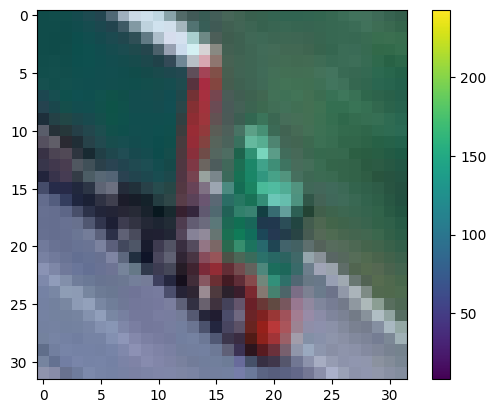

array([9], dtype=uint8)

In [ ]:
index = 50
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.show()

train_labels[index]

## Exe 7 : Display images and class name

To verify that the data is in the correct format and that you're ready to
build and train the network, let's display the first 25 images from the training
set and display the class name below each image.

In [ ]:
class_names = [ 'airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

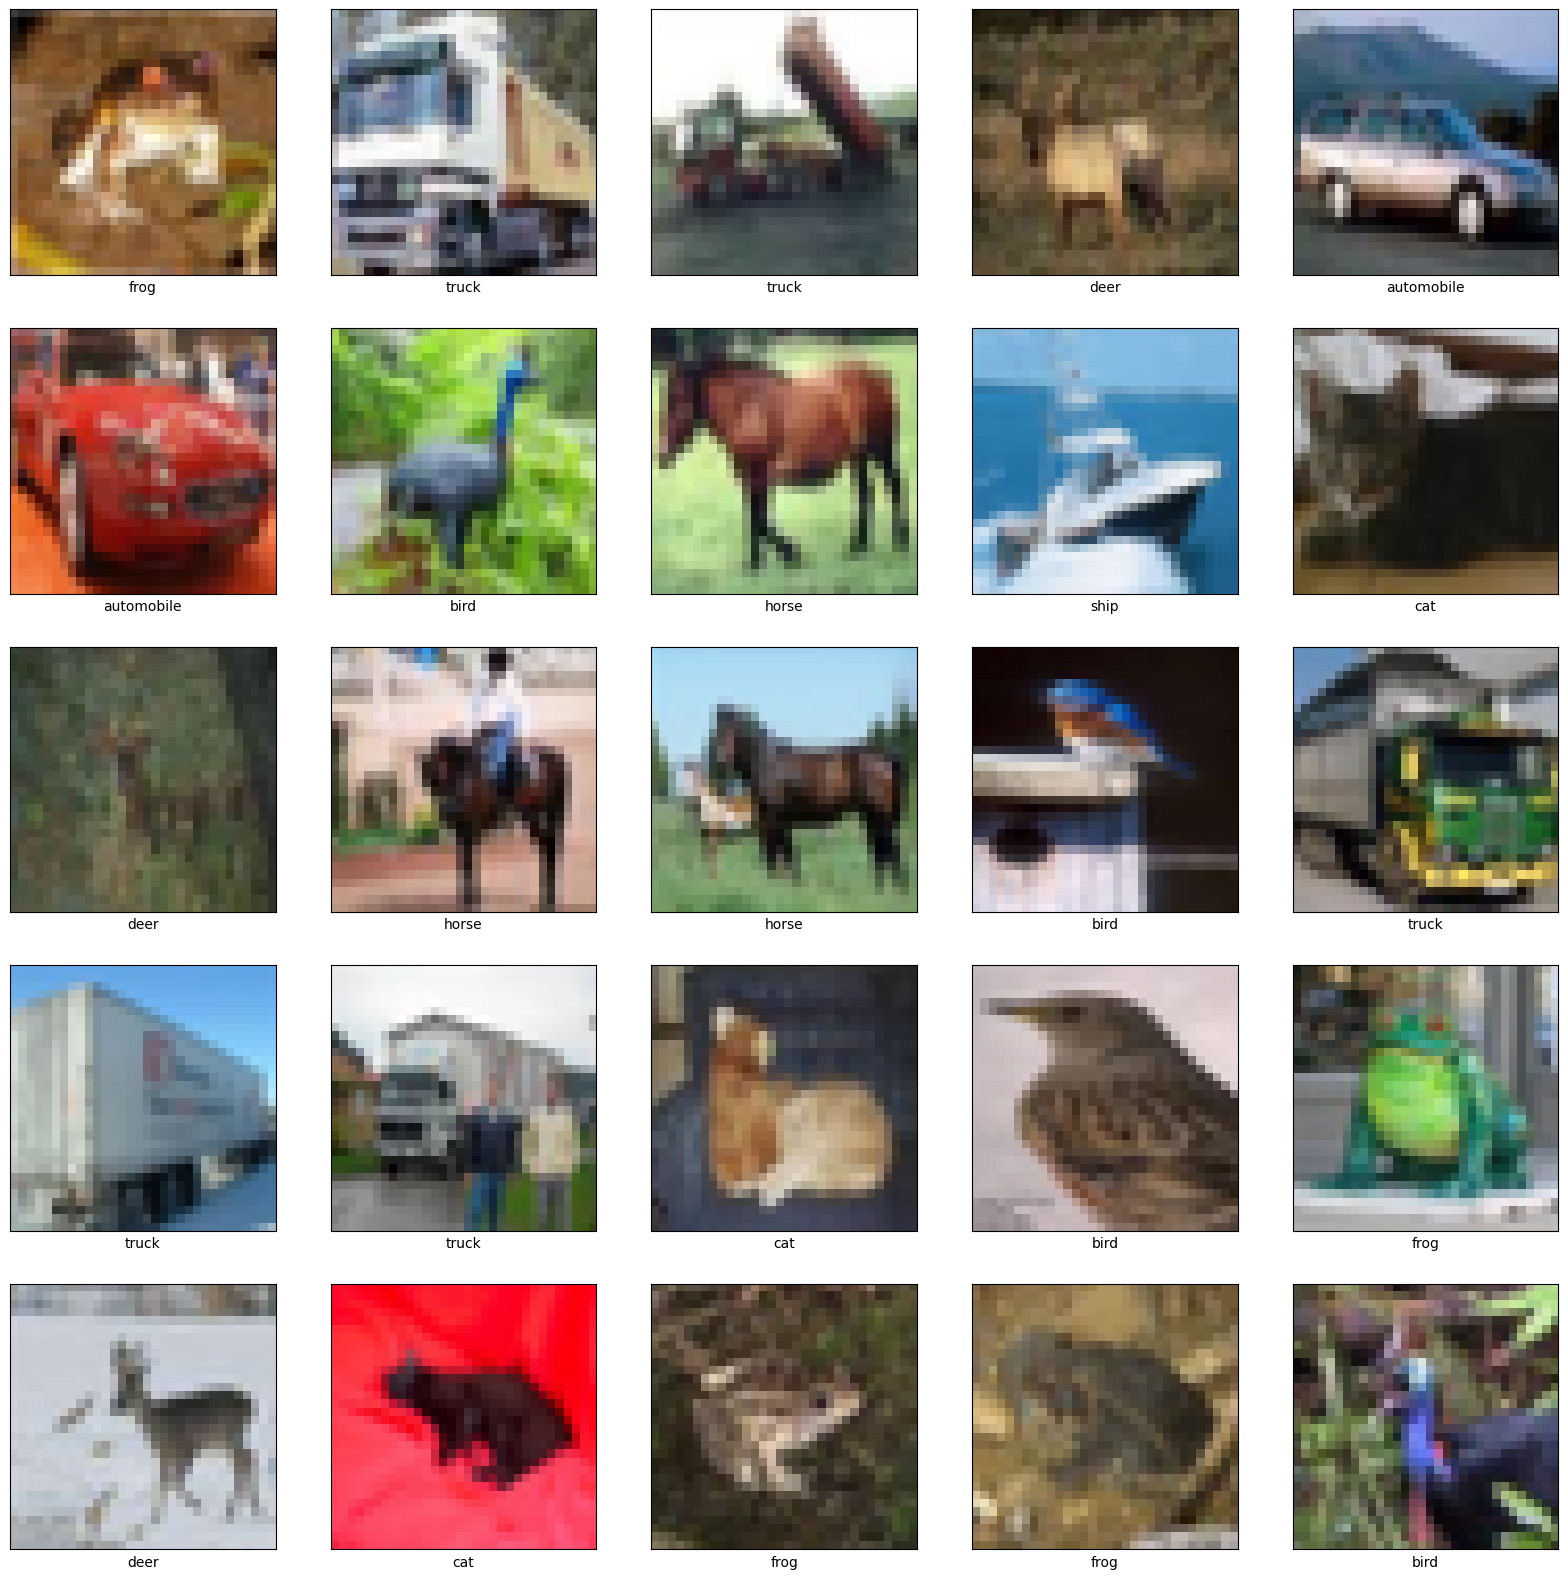

In [ ]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The label is an index, which you'll use to access the class name
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Exe 8: Dataset Normalization

Normalize the train and test sets using the following code

In [ ]:
train_images_before = train_images
test_images_before = test_images

In [ ]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [ ]:
train_images

array([[[[0.00090734, 0.00095348, 0.00096886],
         [0.00066128, 0.00070742, 0.00069204],
         [0.00076894, 0.00073818, 0.00066128],
         ...,
         [0.00242983, 0.00202999, 0.0016609 ],
         [0.00233756, 0.00192234, 0.00156863],
         [0.00227605, 0.00190696, 0.00158401]],

        [[0.00024606, 0.00030757, 0.00030757],
         [0.        , 0.        , 0.        ],
         [0.00027682, 0.00012303, 0.        ],
         ...,
         [0.00189158, 0.00135333, 0.00084583],
         [0.00183007, 0.00127643, 0.00076894],
         [0.0018762 , 0.00133795, 0.00087659]],

        [[0.00038447, 0.00036909, 0.00032295],
         [0.00024606, 0.00010765, 0.        ],
         [0.00075356, 0.00041522, 0.00012303],
         ...,
         [0.00181469, 0.00129181, 0.00076894],
         [0.00184544, 0.00129181, 0.00076894],
         [0.00167628, 0.00112265, 0.00064591]],

        ...,

        [[0.00319877, 0.00261438, 0.00147636],
         [0.00309112, 0.00235294, 0.00052288]

## Exo 9: Model

Build a neural network with the following structure:


1.   The first layer should be a **Flatten** layer that transforms the format of the images from a two-dimensional array (32 by 32 pixels) to a one-dimensional array (1024 pixels). This layer simply unstacks the rows of pixels in the image and lines them up. It has no parameters to learn and only reformats the data.

2.   After the pixels are flattened, the network should consist of two **Dense** layers. The first **Dense** layer should have 128 neurons.

3.   The second (and last) layer should be a **softmax** layer with 10 neurons, which returns an array of 10 probability scores that sum to 1. Each neuron contains a score indicating the probability that the current image belongs to one of the 10 classes.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    # First layer: Correctly flattened input considering color channels
    layers.Flatten(input_shape=(32, 32, 3)),  # Now correctly assuming color images

    # Second layer: Dense layer with 128 neurons
    layers.Dense(128, activation='relu'),

    # Third layer: Softmax layer with 10 neurons for classification
    layers.Dense(10, activation='softmax')
])

## Exe 10: Train the model

Compile the model using the appropriate optimizer, loss function, and metrics. Set the optimizer to 'adam', the loss function to 'sparse_categorical_crossentropy', and the metric to 'accuracy'.

Train the model, using the fit method on the model object. Pass in the train_images as the training data and train_labels as the corresponding labels.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 2.0925 - accuracy: 0.2414
Epoch 2/10
782/782 [==============================] - 3s 3ms/step - loss: 1.9233 - accuracy: 0.3170
Epoch 3/10
782/782 [==============================] - 3s 3ms/step - loss: 1.8718 - accuracy: 0.3394
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 1.8331 - accuracy: 0.3532
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 1.8017 - accuracy: 0.3651
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 1.7737 - accuracy: 0.3730
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 1.7487 - accuracy: 0.3830
Epoch 8/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7262 - accuracy: 0.3913
Epoch 9/10
782/782 [==============================] - 2s 3ms/step - loss: 1.7041 - accuracy: 0.4000
Epoch 10/10
782/782 [==============================] - 2s 3ms/step - loss: 1.6853 - accuracy: 0.4056

## Exe 11: Evaluate the model

Chek the model performance on the test dataset.

In [ ]:
Ex11: test_loss, test_acc = model.evaluate(test_images,test_labels)

print('\nTest accuracy:', test_acc)

# Homework Assignment: Deep Neural Network Classification with Fashion MNIST

Redo the classification part, this time utilizing the Fashion MNIST dataset and a DNN model with three Dense layers. The first and second Dense layers should have 128 neurons each. Additionally, incorporate the following specifications:

* Apply dropout after each hidden layer with a dropout rate of 0.25 (25% of neurons dropped randomly for the subsequent layer).
*  Set the batch size to 512.
*  Implement early stopping while fitting the model with a patience value of 20 and a maximum number of epochs set to 200.
*  Save the best model as 'model_best'.
*  Evaluate the saved model on the test data.

**For the submission of your work, please submit your completed assignment in HTML format.**



# Converting a notebook to html

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#%%shell
!jupyter nbconvert --to html '/content/gdrive/MyDrive/Colab Notebooks/DL_Lab1_NN.ipynb'